In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
from VersaQT.data_manip import *

plt.rcParams["figure.figsize"] = (10, 6)  # Width=10, Height=6 (in inches)

In [8]:
corn = yf.download("ZC=F", start="2020-01-01", end="2023-12-31", interval="1d")
corn.columns = corn.columns.get_level_values(0)
corn

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,391.50,392.00,387.25,387.75,103987
2020-01-03,386.50,392.00,385.50,391.50,125931
2020-01-06,384.75,387.75,382.75,386.25,112130
2020-01-07,384.50,385.75,383.50,385.00,93541
2020-01-08,384.25,385.50,382.25,384.00,135523
...,...,...,...,...,...
2023-12-22,473.00,474.00,471.50,472.50,80484
2023-12-26,480.25,481.00,471.50,473.00,114198
2023-12-27,476.50,480.25,474.50,479.75,107950


In [6]:
corn.reset_index(inplace=True)
corn

Price,Date,Close,High,Low,Open,Volume
0,2020-01-02,391.50,392.00,387.25,387.75,103987
1,2020-01-03,386.50,392.00,385.50,391.50,125931
2,2020-01-06,384.75,387.75,382.75,386.25,112130
3,2020-01-07,384.50,385.75,383.50,385.00,93541
4,2020-01-08,384.25,385.50,382.25,384.00,135523
...,...,...,...,...,...,...
1001,2023-12-22,473.00,474.00,471.50,472.50,80484
1002,2023-12-26,480.25,481.00,471.50,473.00,114198
1003,2023-12-27,476.50,480.25,474.50,479.75,107950
1004,2023-12-28,474.25,478.75,474.00,476.00,99398


<Axes: ylabel='Close'>

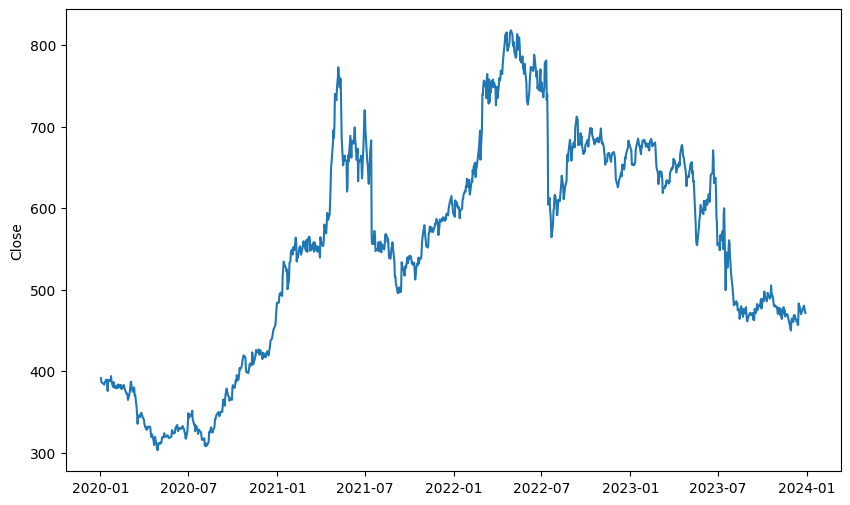

In [9]:
sns.lineplot(corn, y="Close", x=corn.index.values)

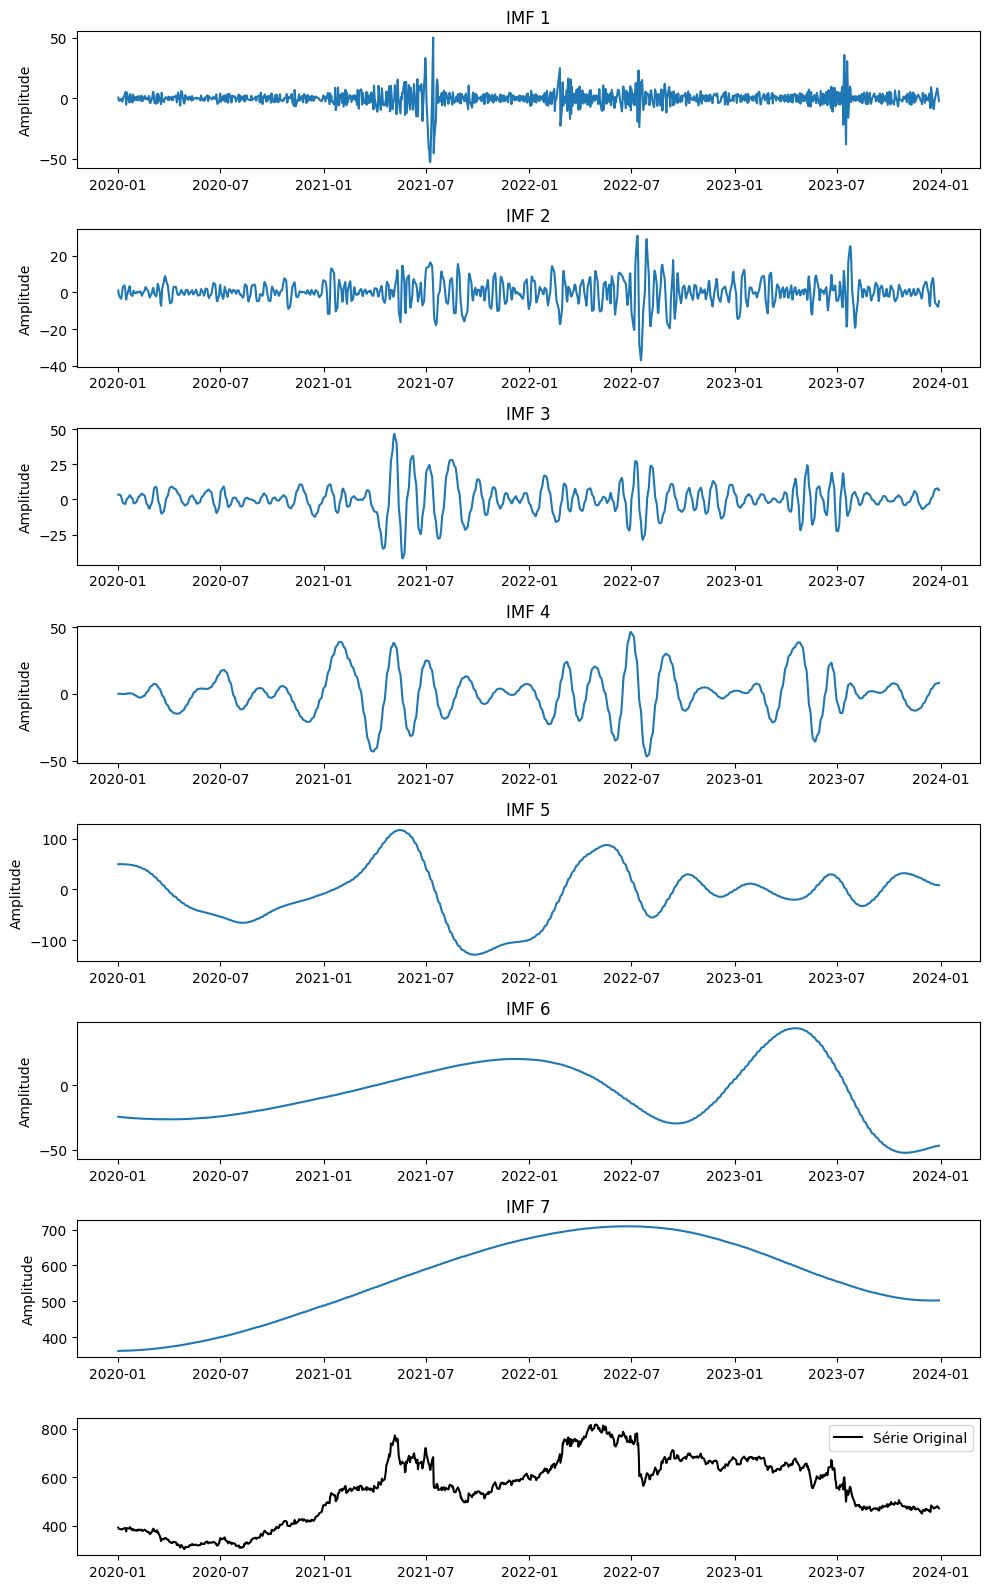

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PyEMD import CEEMDAN

# Criando uma série temporal de exemplo
t = np.linspace(0, 10, 1000)
serie = np.sin(2 * np.pi * t) + 0.5 * np.sin(4 * np.pi * t) + 0.2 * np.sin(8 * np.pi * t) + 0.1 * np.random.randn(1000)
# print(serie)

t = corn.Date.values
serie = corn.Close.values
# print(serie)

# Aplicando CEEMDAN
ceemdan = CEEMDAN()  # Criando o objeto CEEMDAN
imfs = ceemdan(serie)  # Decompondo a série

# Plotando os IMFs
num_imfs = imfs.shape[0]
plt.figure(figsize=(10, 16))
for i in range(num_imfs):
    plt.subplot(num_imfs + 1, 1, i + 1)
    plt.plot(t, imfs[i])
    plt.title(f'IMF {i+1}')
    plt.ylabel("Amplitude")

# Última subplot: série original
plt.subplot(num_imfs + 1, 1, num_imfs + 1)
plt.plot(t, serie, label="Série Original", color='black')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
from pysr import PySRRegressor
import sympy as smp


pysr = PySRRegressor(
    binary_operators=["+", "-", "*", "/"], 
    unary_operators=["exp", "cos", "sin", "tan"],
    temp_equation_file=True,
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    niterations=60,
    populations=20,
    population_size=60,
    maxsize=40,
    warm_start=False,
    verbosity=False,
    progress=False
)

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [10]:
from sklearn.model_selection import train_test_split
from personal_projects.symbolic_reconstruct import *

X = np.c_[corn.index.values]
y = np.c_[corn.Close.values]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [11]:
for i in range(10):
    print(f"Started Decomp - {i}")
    symbolic_reconstruct(pysr, X_train, y_train, save_path=f"save_results/decomposition_test_train-{i}.pkl")

Started Decomp - 0


e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `

Started Decomp - 1


e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `

Started Decomp - 2


e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `

Started Decomp - 3


e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `

Started Decomp - 4


e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `

Started Decomp - 5


e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `

Started Decomp - 6


e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `

Started Decomp - 7


e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `

Started Decomp - 8


e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `

Started Decomp - 9


e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
e:\Documents\Coding\Repositorios\MyRepositories\Versatus\VersaQuant\.venv\Lib\site-packages\pysr\sr.py:2173: UserWarning: The discovered expressions are being reset. Please set `

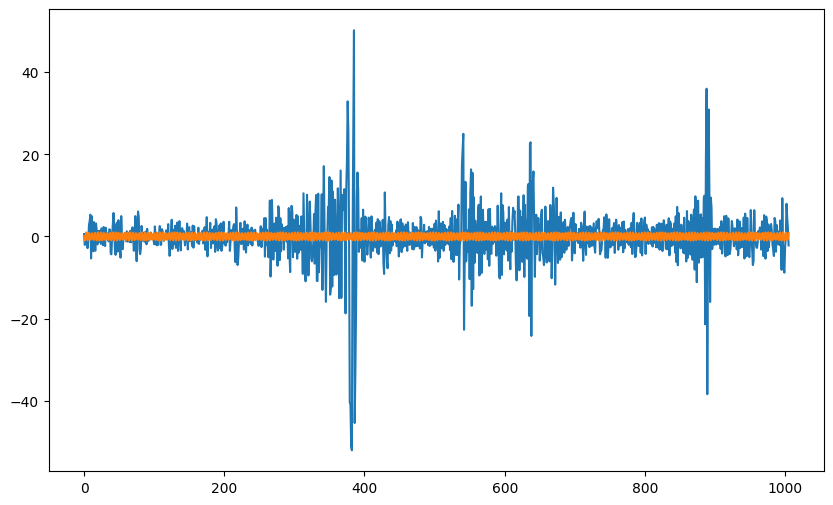

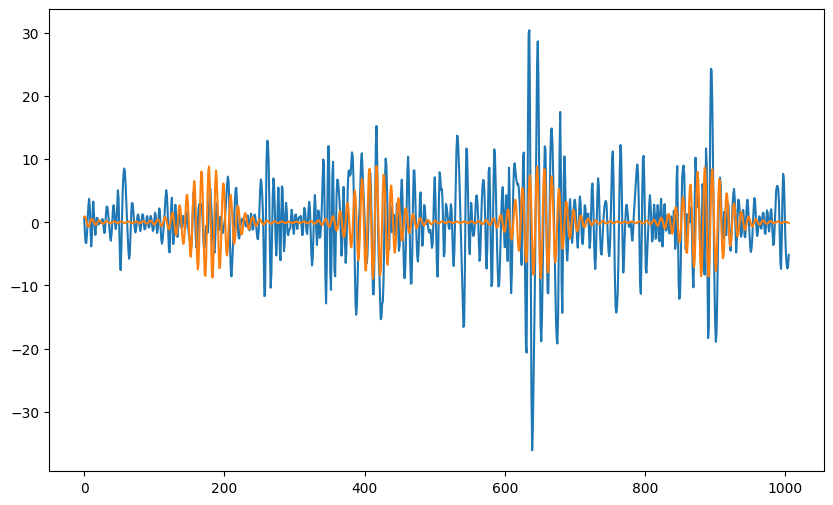

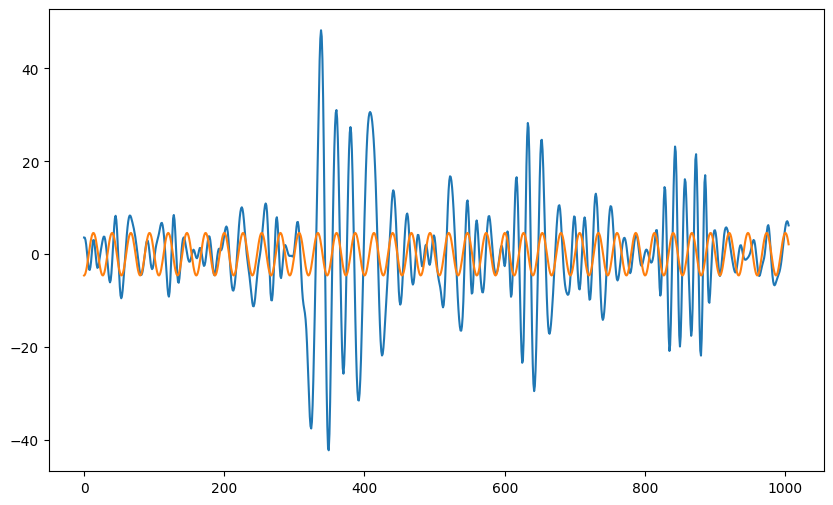

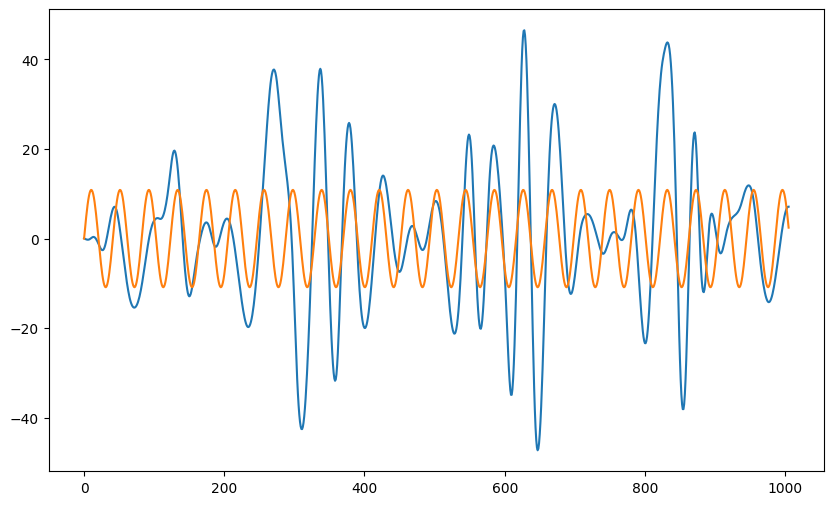

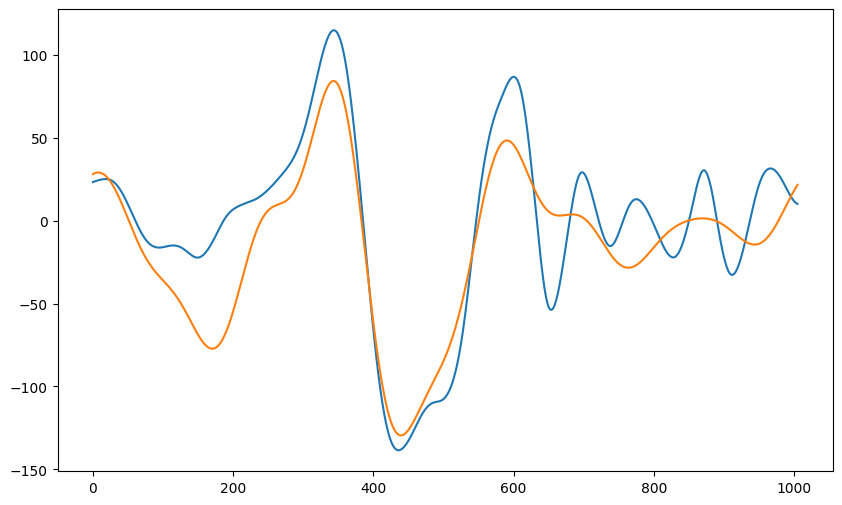

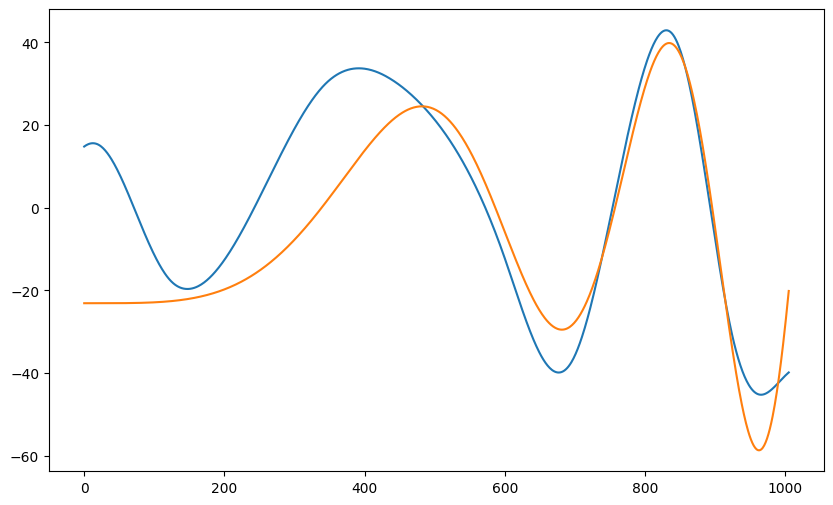

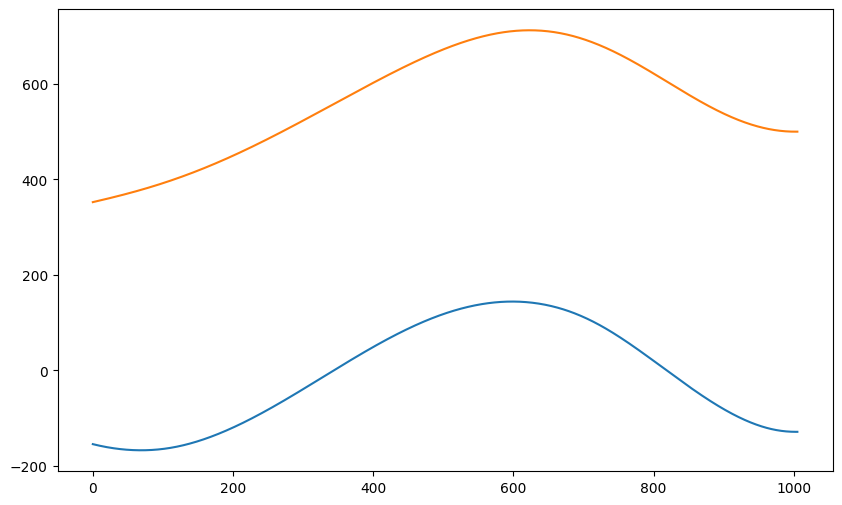

In [24]:
x = smp.symbols("x0")

with open(f"save_results/decomposition_test-{3}.pkl", "rb") as file:
        solutions = pickle.load(file)
solutions

plt.figure(figsize=(10, 6))

for c, sol in enumerate(solutions):
    func = smp.lambdify([x], sol)
    plt.plot(X, imfs[c])
    plt.plot(X, func(X))
    plt.show()

In [11]:
with open(f"save_results/decomposition_test-{0}.pkl", "rb") as file:
        solutions = pickle.load(file)
solutions

[0.42470363 + 0.07398786/cos(0.739222104751616*tan(0.917216193818788*tan(13.279656/cos(tan(19.984035/(-0.48848074*x0 + 0.24424037*tan(x0) + 1.0174445)))) + 0.212485002432645) + 3.09373787213734),
 3.0606568*(sin(0.051758647*x0 - 0.7487096) + 0.73993224)*sin(0.5766807*x0),
 -4.25443965668714*sin(0.2749415*x0 - 0.22883389293245) - 4.25443965668714*cos(0.2357525*x0),
 9.4596183554813*cos(0.1502768*x0),
 51.9199854873257*exp(-0.002392124*x0*cos(0.007743762*x0))*cos(0.020221842*x0),
 -35.549503*sin(0.019888816*x0) + 35.549503*sin(0.018050293*x0 + 0.3197098 + 3.0929315*exp(-0.009920415*x0)),
 0.2752131*x0 - (0.14266247*x0 + 18.520578*cos(0.00675198930484894*x0) + 51.486835)*cos(0.00630271591592076*x0 - 0.17587854) + 430.56207]

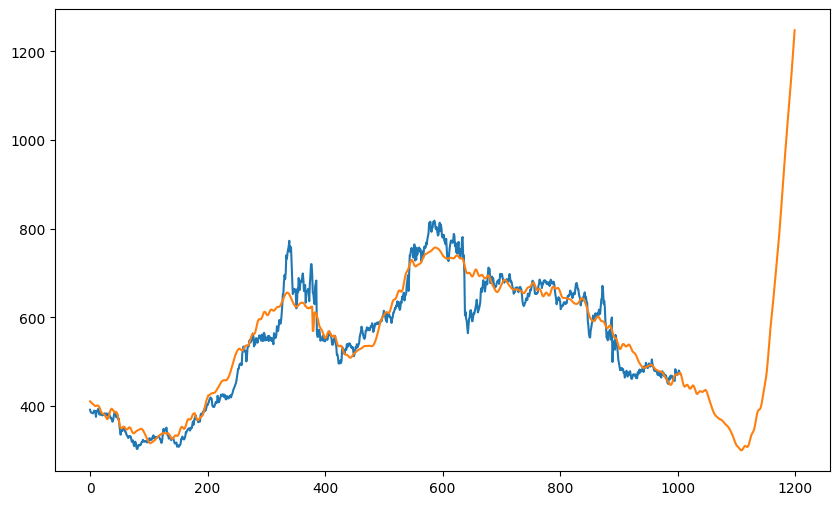

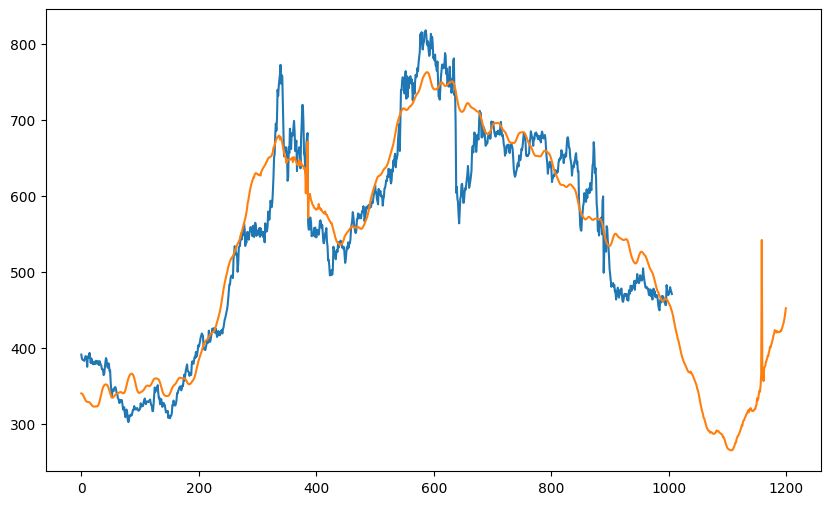

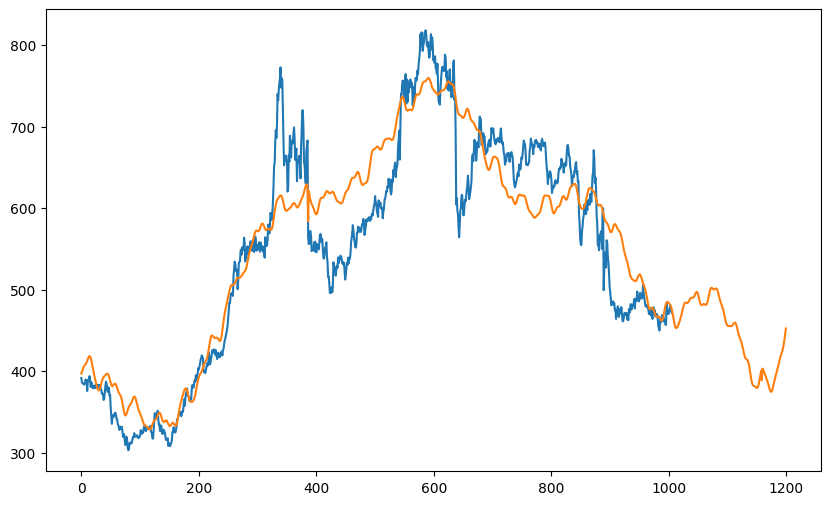

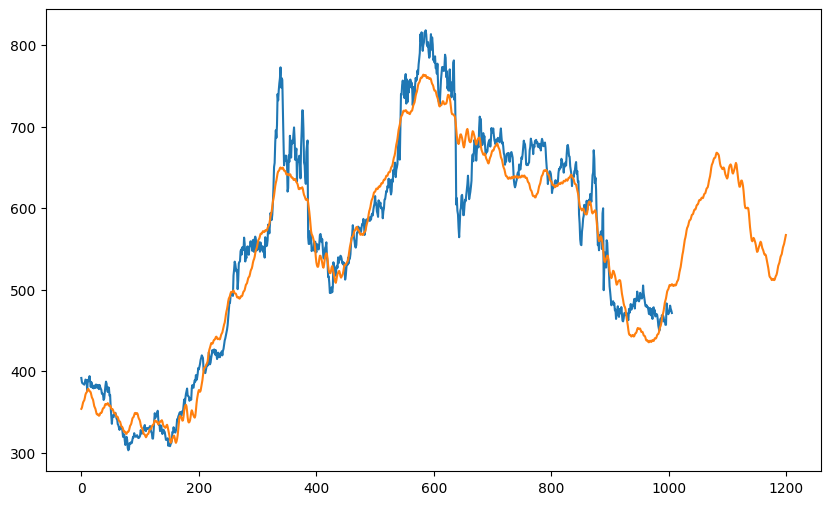

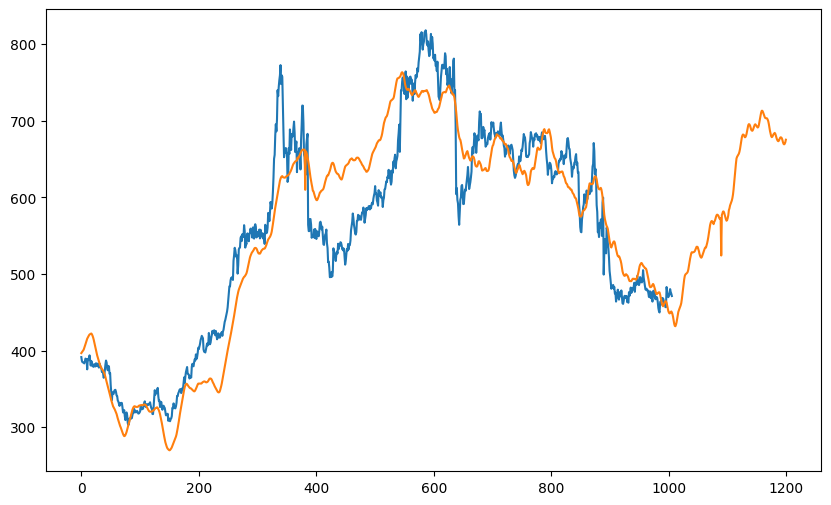

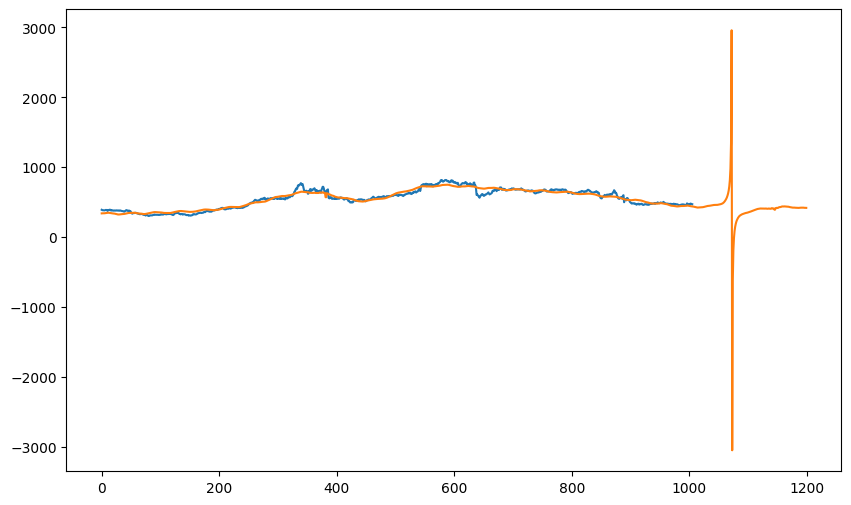

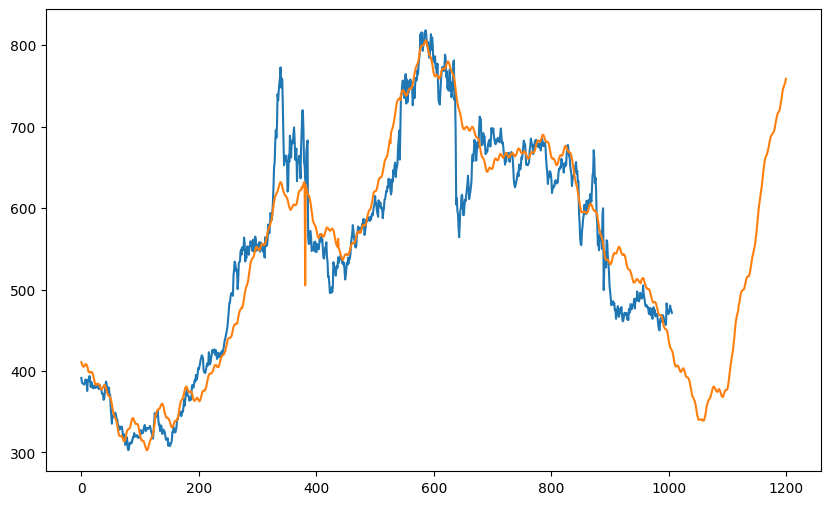

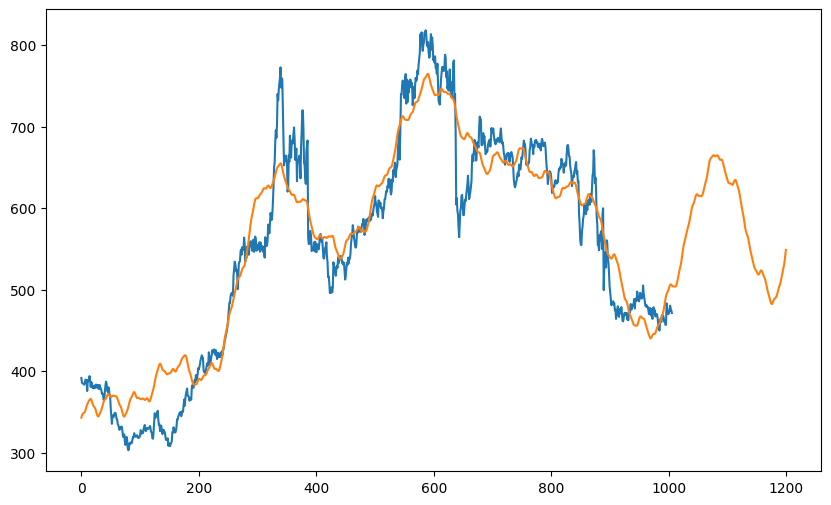

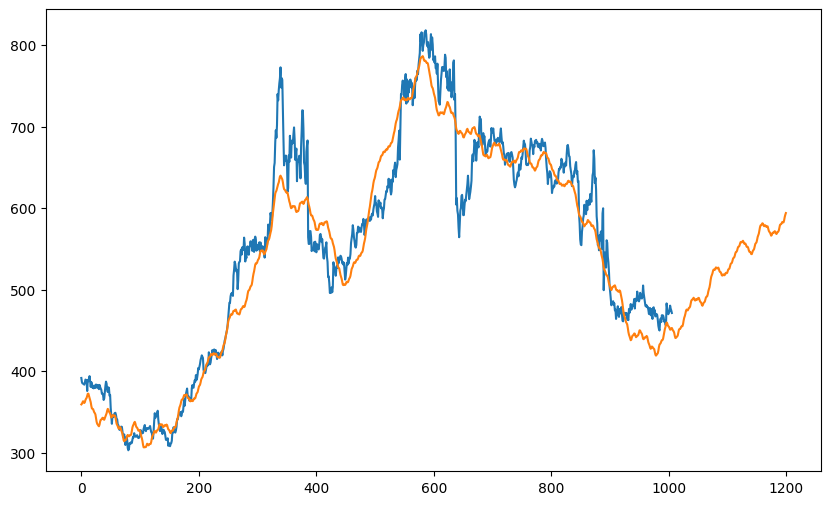

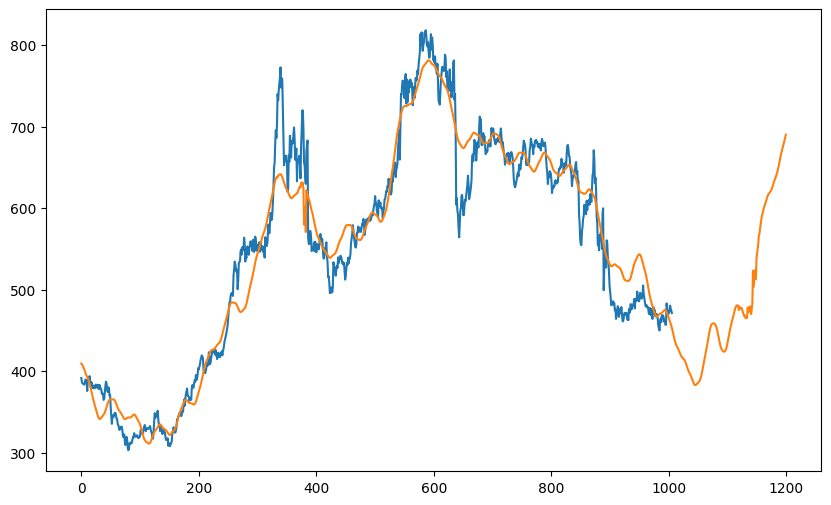

In [26]:
import pickle

x = smp.symbols("x0")

for i in range(10):
    with open(f"save_results/decomposition_test-{i}.pkl", "rb") as file:
        solutions = pickle.load(file)
    
    imfs_sum = np.sum(imfs, axis=0)
    sum_func = smp.lambdify([x], np.sum(solutions))
    plt.plot(X, imfs_sum)
    # plt.plot(X, corn.Close)
    X_extend = np.arange(0, 1200)
    plt.plot(X_extend, sum_func(X_extend))
    plt.show()